# ⛓️ **Evaluación del modelo**

## 📚 **Librerías**

In [19]:
import pandas as pd
import numpy as np

In [20]:
import os

In [21]:
import matplotlib.pyplot as plt

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
import joblib

## ▶️ **Carga de datos**

In [25]:
# Cargar datos
file_name = '../data/transformed/transport_fe.csv'
base_path = os.getcwd()
file_path = os.path.join(base_path, file_name)

df = pd.read_csv(file_path, index_col=0)

In [26]:
# Cargar modelo entrenado
model_path = os.path.join(base_path, '../models/modelo_duracion_viaje.pkl')
pipeline = joblib.load(model_path)

## ➗ **Dividir en Train/Test**

In [27]:
# Split
X = df.drop(columns=["trip_duration_min"])
y = df["trip_duration_min"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 📯 **Pipeline**

In [28]:
# Generar predicciones con el Pipeline ya entrenado
y_pred = pipeline.predict(X_test)

In [29]:
# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📈 Métricas de Evaluación del Modelo")
print("=" * 40)
print(f"MAE:  {mae:.3f} minutos")
print(f"RMSE: {rmse:.3f} minutos")
print(f"R²:   {r2:.4f}")
print("=" * 40)

📈 Métricas de Evaluación del Modelo
MAE:  2.488 minutos
RMSE: 3.089 minutos
R²:   0.9493


## 📊 **Actual vs Predicho**

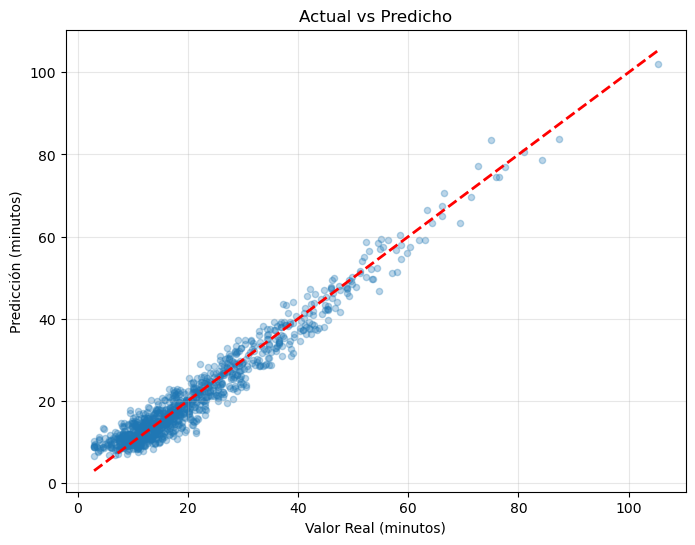

In [30]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, alpha=0.3, s=20)
plt.xlabel("Valor Real (minutos)")
plt.ylabel("Predicción (minutos)")
plt.title("Actual vs Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

## 🗑️ **Análisis de Residuos**

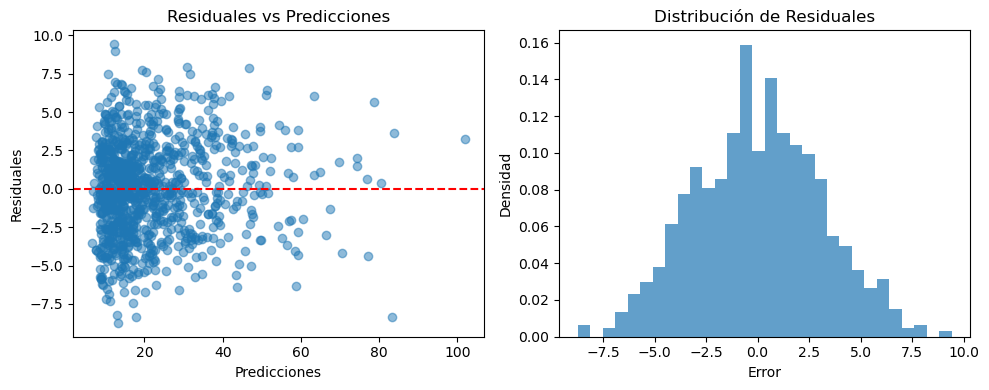

In [31]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Residuales vs Predicciones')

plt.subplot(1, 2, 2)
plt.hist(errors, bins=30, alpha=0.7, density=True)
plt.xlabel('Error')
plt.ylabel('Densidad')
plt.title('Distribución de Residuales')

plt.tight_layout()
plt.show()

## 🗜️ **Importancia de las features**

In [32]:
features = [
    'trip_distance_km',
    'congestion_index',
    'distance_congestion',
    'rain_mm',
    'time_maniana',
    'time_tarde',
    'time_noche',
    'hour_sin',
    'hour_cos',
    'is_weekend'
]

target = 'trip_duration_min'

In [33]:
# Obtener coeficientes del modelo
linreg = pipeline.named_steps['model']
coef = linreg.coef_
feature_names = features  # Usamos los nombres originales ya que el preprocesamiento está en el pipeline

# Calcular importancia (valor absoluto de coeficientes)
importance = sorted(zip(feature_names, coef), key=lambda x: abs(x[1]), reverse=True)

print("📊 Importancia de Features (Coeficientes)")
print("=" * 50)
for feature, coef_value in importance:
    print(f"{feature:25} {coef_value:>7.3f}")
print("=" * 50)


📊 Importancia de Features (Coeficientes)
trip_distance_km            8.684
distance_congestion         5.221
congestion_index            2.093
rain_mm                     0.543
time_maniana                0.076
hour_cos                   -0.060
is_weekend                 -0.054
time_noche                 -0.047
hour_sin                   -0.045
time_tarde                 -0.013


# ⚠️ **Overfitting**

In [34]:
# Prevenir overfitting
y_train_pred = pipeline.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f"🎯 R² Training: {train_r2:.4f} | R² Test: {r2:.4f}")
print(f"📉 Diferencia: {train_r2 - r2:.4f} (ideal < 0.05)")

🎯 R² Training: 0.9567 | R² Test: 0.9493
📉 Diferencia: 0.0073 (ideal < 0.05)


✅ **No presenta sobreajuste**